# Phyiscs Problems - Lectures 18 & 19 - Homework 9 

FALL 2023


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a program that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [15]:
from numpy import pi

period = int(input("Enter the period of the satellite's orbit in minutes: "))

def orbit_height(t):
    height = (6.67e-11 * 5.97e24 * ((t*60)**2) / (4 * (pi**2)))**(1/3) - 6371000

    return height

print("The orbital height of the satellite is " + str(orbit_height(period)))


Enter the period of the satellite's orbit in minutes: 1436
The orbital height of the satellite is 35777675.946830556


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





Enter orbital period in minutes: 1440
Enter orbital period in minutes: 90
Enter orbital period in minutes: 45


35855910 meters
279322 meters
-2181560 meters


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [16]:
print(str(orbit_height(24*60) - orbit_height(23.93*60)))

print("this difference is because the earth is orbiting the sun probably")

82147.84627933055
this difference is because the earth is orbiting the sun probably


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

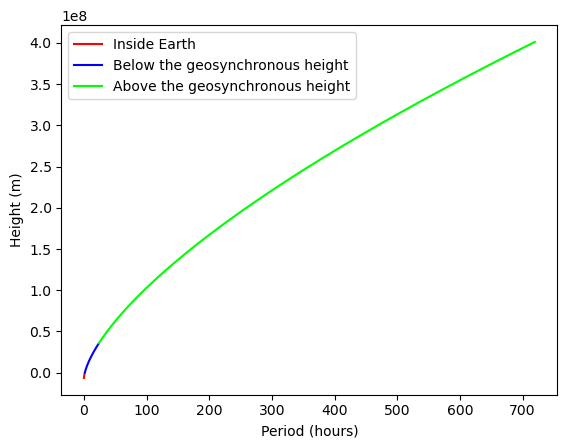

In [30]:
from pylab import plot, xlabel, ylabel, show, legend

max_time = 24*30 # in hours
step_time = 0.5 # in hours

period_ie = []
period_bg = []
period_ag = []

inside_earth = []
below_geo = []
above_geo = []

for i in range(int(max_time / step_time)):
    period.append(i*step_time*60)
    h = orbit_height(i*step_time*60)
    
    if h <= 0:
        inside_earth.append(h)
        period_ie.append(i*step_time)
    elif h <= orbit_height(23.93*60):
        below_geo.append(h)
        period_bg.append(i*step_time)
    else:
        above_geo.append(h)
        period_ag.append(i*step_time)
    
plot(period_ie, inside_earth, color="#ff0000")
plot(period_bg, below_geo, color="#0000ff")
plot(period_ag, above_geo, color="#00ff00")
legend(["Inside Earth", "Below the geosynchronous height", "Above the geosynchronous height"])
xlabel("Period (hours)")
ylabel("Height (m)")
show()

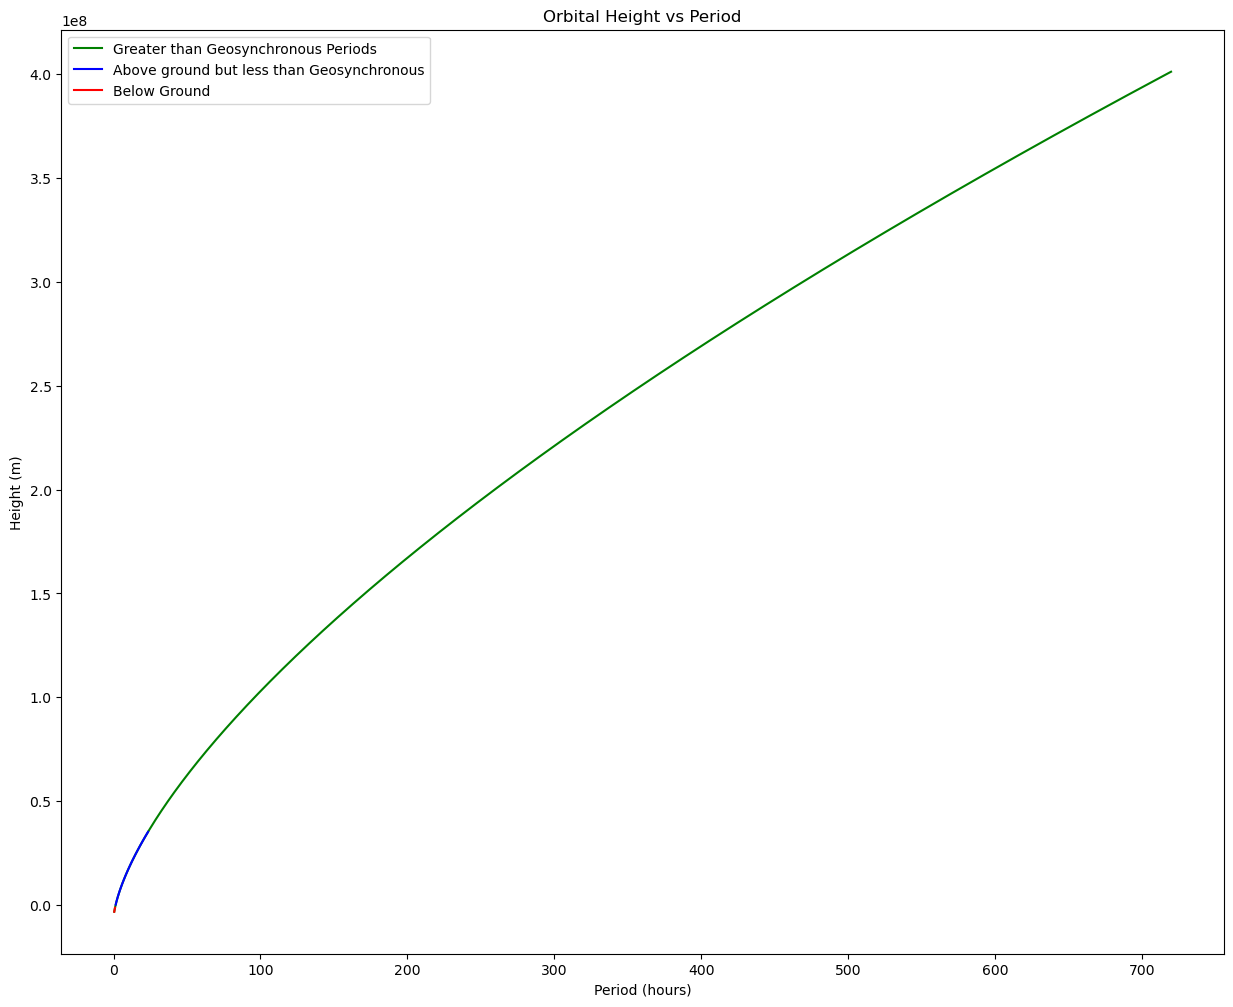

### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [31]:
x = float(input("Enter the distance to the planet in lightyears: "))
v = float(input("Enter the speed of the spaceship traveling to that planet in lightyears per year: "))

gamma = 1 / ((1 - v**2)**.5)
t = x/v
t_prime = gamma * (t - (v*x))

print("To an observer on Earth, it will take " + str(t) + " years for the spaceship to reach the planet.")
print("To a passenger on the ship, it will take " + str(t_prime) + " years for the spaceship to reach the planet.")

Enter the distance to the planet in lightyears: 10
Enter the speed of the spaceship traveling to that planet in lightyears per year: .9
To an observer on Earth, it will take 11.11111111111111 years for the spaceship to reach the planet.
To a passenger on the ship, it will take 4.843221048378526 years for the spaceship to reach the planet.


#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

What is the velocity as a fraction of the speed of light? .9
How far are you traveling in light years? 10
Observing from Earth it took 11.11 years.
Passengers on board the ship percieved to take 4.84 years.
What is the velocity as a fraction of the speed of light? .98
How far are you traveling in light years? 10
Observing from Earth it took 10.2 years.
Passengers on board the ship percieved to take 2.03 years.
What is the velocity as a fraction of the speed of light? .999
How far are you traveling in light years? 10
Observing from Earth it took 10.01 years.
Passengers on board the ship percieved to take 0.45 years.


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [36]:
a = float(input("Enter a: "))
b = float(input("Enter b: "))
c = float(input("Enter c: "))

solution_1 = ((-1*b) + (((b**2) - (4*a*c))**0.5)) / (2*a)
solution_2 = ((-1*b) - (((b**2) - (4*a*c))**0.5)) / (2*a)

print("x = " + str(solution_1) + ", " + str(solution_2))

s1alt = ((2*c) / ((-1*b) + (((b**2) - (4*a*c))**0.5)))
s2alt = ((2*c) / ((-1*b) - (((b**2) - (4*a*c))**0.5)))

print("Alternatively, x = " + str(s1alt) + ", " + str(s2alt))


#the difference is because the first equation is dividing by a small value 

Enter a: .001
Enter b: 1000
Enter c: .001
x = -9.999894245993346e-07, -999999.999999
Alternatively, x = -1000010.5755125057, -1.000000000001e-06


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

The two roots are -9.999894245993346e-07 and -999999.999999
The two roots are -1000010.5755125057 and -1.000000000001e-06


In [51]:
a_input = float(input("Enter a: "))
b_input = float(input("Enter b: "))
c_input = float(input("Enter c: "))

def qformula(a,b,c):
    solution_1 = ((-1*b) + (((b**2) - (4*a*c))**0.5)) / (2*a)
    solution_2 = ((-1*b) - (((b**2) - (4*a*c))**0.5)) / (2*a)

    s1alt = ((2*c) / ((-1*b) - (((b**2) - (4*a*c))**0.5)))
    #s2alt = ((2*c) / ((-1*b) + (((b**2) - (4*a*c))**0.5)))


    if 2*a < (abs(((-1*b) - (((b**2) - (4*a*c))**0.5))**2))**0.5:
        #print("x = " + str(s1alt) + ", " + str(s2alt))
        return s1alt, solution_2
    else:
        #print("x = " + str(solution_1) + ", " + str(solution_2))
        return solution_1, solution_2
        
print("x = " + str(qformula(a_input,b_input,c_input)))

Enter a: .001
Enter b: 1000
Enter c: .001
x = (-1000010.5755125057, -1.000000000001e-06)


The two roots are -1.000000000001e-06 and -999999.999999
The two roots are -1e-08 and -100000000.0
The two roots are 2.0 and 1.0


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases.

### 4) Planetary orbits

The orbit in space of one body around another, such as a planet around the Sun, need not be circular. In general it takes the form of an ellipse, with the body sometimes closer in and sometimes further out. If you are given the distance $l_1$ of closest approach that a planet makes to the Sun, also called its perihelion, and its linear velocity $v_1$ at *perihelion*, then any other property of the orbit can be calculated from these two as follows.

Kepler’s second law tells us that the distance $l_2$ and velocity $v_2$ of the planet at its most distant point, or *aphelion*, satisfy $l_2 v_2 = l_1 v_1$. 


Given the values of $v_1$, $l_1$, and $l_2$, other parameters of the orbit are given by simple formulas can that be derived from Kepler’s laws and the fact that the orbit is an ellipse:

Semi-Major Axis $$ a = \frac{1}{2} (l_1 + l_2) $$ 
Semi-Minor Axis: $$ b = \sqrt{l_1  l_2} $$ 
Orbital Period: $$ T = \frac{2 \pi a b}{l_1 v_1} $$ 
Orbital eccentricity:  $$ e = \frac{l_2 - l_1}{l_2 + l_1}$$

#### Write a program with functions that asks the user to enter the distance to the Sun and velocity at perihelion, then calculates and prints the quantities $l2$, $v2$, $a$, $b$, $T$, and $e$.




In [60]:
from numpy import pi

v_1 = float(input("Enter the velocity at perihelion: "))
l_1 = float(input("Enter the distance to the Sun at perihelion: "))
v_2 = 0

G = 6.6743e-11
M = 1.989e30

v_2_possible = qformula(1, (-2*G*M)/(v_1*l_1), -1*((v_1**2)-(2*G*M/l_1)))

#print(type(v_2_possible))
#print(v_2_possible)

if v_2_possible[0] > 0 and v_2_possible[1] <= 0:
    v_2 = v_2_possible[0]
elif v_2_possible[1] > 0 and v_2_possible[0] <= 0:
    v_2 = v_2_possible[1]
else:
    v_2 = min(v_2_possible)
    



l_2 = l_1 * v_1 / v_2
a = 0.5 * (l_1 + l_2)
b = (l_1 * l_2)**0.5
T = (2*pi*a*b / (l_1 * v_1)) / 3.154e7
e = (l_2 - l_1) / (l_2 + l_1)

print("l_2 = " + str(l_2) + " meters\nv_2 = " + str(v_2) + " m/s\na = " + str(a) + " meters\nb = " + str(b) + " meters\nT = " + str(T) + " years\ne = " + str(e))

Enter the velocity at perihelion: 5.4529e4
Enter the distance to the Sun at perihelion: 8.783e10
l_2 = 5274268185967.947 meters
v_2 = 908.04674717561 m/s
a = 2681049092983.9736 meters
b = 680616613647.922 meters
T = 75.90232438824339 years
e = 0.9672404357570915


#### Test your program by having it calculate the properties of the orbits of the Earth (for which $l_1 = 1.4710 \times 10^{11}$ m and $v_1 = 3.0287 \times 10^4$ m s$^{−1}$ ) and Halley’s comet ($l_1 = 8.7830 \times 10^{10}$ m and $v_1 = 5.4529 \times 10^4$ m s${−1}$ ). Among other things, you should find that the orbital period of the Earth is one year and that of Halley’s comet is about 76 years.

Enter the perihelion in meters: 1.471e11
Enter the velocity at perihelion in m/s: 3.0287e4
l2 = 152203426488.95538 meters
v2 = 29271.467816286593 m/s
a = 149651713244.4777 meters
b = 149629957015.71707 meters
T = 1.0013930557484005 years
e = 0.017051012575506567


Enter the perihelion in meters: 8.7830e10
Enter the velocity at perihelion in m/s: 5.4529e4
l2 = 5472738862158.555 meters
v2 = 875.1161330052964 m/s
a = 2780284431079.2773 meters
b = 693304157108.1093 meters
T = 80.18919937477547 years
e = 0.9684097069284723
